In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
import json
import csv
import datetime
import geopandas as gp

now = datetime.datetime.now()

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

Perform API Calls
Perform a weather check on each city using a series of successive API calls.
Include a print log of each city as it'sbeing processed (with the city number and city name).


In [16]:
#Adding the URL and a df for the results 
url = f'https://api.openweathermap.org/data/2.5/weather?APPID={api_key}&units=imperial&q='
weatherpy_df = pd.DataFrame({'City':[],'Cloudiness':[],'Country':[],
                       'Date':[],'Humidity':[], 'Lat':[], 'Lng':[],
                       'Max_temp':[], 'Wind_speed':[]})

In [18]:
#start the call and run through them.. 
#im blanking on how to hide my API key..
#open weathermap documentation https://openweathermap.org/api
i = 0
for city in cities:
    response_req = requests.get(url+city)
    response = response_req.json()

    if (response['cod'] == 200):
        i = i+1
        print(f'Item Number {i} {city}')
        print(response_req.url)
        
        weatherpy_df.loc[i,'City'] = city
        weatherpy_df.loc[i,'Cloudiness'] = response['clouds']['all']
        weatherpy_df.loc[i,'Country'] = response['sys']['country']
        weatherpy_df.loc[i,'Date'] = now.strftime("%Y-%m-%d")
        weatherpy_df.loc[i,'Humidity'] = response['main']['humidity']
        weatherpy_df.loc[i,'Lat'] = response['coord']['lat']
        weatherpy_df.loc[i,'Lng'] = response['coord']['lon']
        weatherpy_df.loc[i,'Max_temp'] = response['main']['temp_max']
        weatherpy_df.loc[i,'Wind_speed'] = response['wind']['speed']
        
    else:
            print('city not found: pass')

Item Number 1 carnarvon
https://api.openweathermap.org/data/2.5/weather?APPID=957372ba5eb650e0988aa658f132bdec&units=imperial&q=carnarvon
Item Number 2 diffa
https://api.openweathermap.org/data/2.5/weather?APPID=957372ba5eb650e0988aa658f132bdec&units=imperial&q=diffa
city not found: pass
Item Number 3 darab
https://api.openweathermap.org/data/2.5/weather?APPID=957372ba5eb650e0988aa658f132bdec&units=imperial&q=darab
Item Number 4 ushuaia
https://api.openweathermap.org/data/2.5/weather?APPID=957372ba5eb650e0988aa658f132bdec&units=imperial&q=ushuaia
Item Number 5 vaini
https://api.openweathermap.org/data/2.5/weather?APPID=957372ba5eb650e0988aa658f132bdec&units=imperial&q=vaini
Item Number 6 noumea
https://api.openweathermap.org/data/2.5/weather?APPID=957372ba5eb650e0988aa658f132bdec&units=imperial&q=noumea
Item Number 7 new%20norfolk
https://api.openweathermap.org/data/2.5/weather?APPID=957372ba5eb650e0988aa658f132bdec&units=imperial&q=new%20norfolk
Item Number 8 hilo
https://api.openweat

Convert Raw Data to DataFrame¶
Export the city data into a .csv.
Display the DataFrame

In [19]:
weatherpy_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_temp,Wind_speed
1,carnarvon,0.0,ZA,2019-05-28,64.0,-30.97,22.13,53.24,13.69
2,diffa,57.0,NE,2019-05-28,26.0,13.32,12.61,95.54,9.44
3,darab,22.0,IR,2019-05-28,42.0,28.75,54.55,69.62,2.55
4,ushuaia,75.0,AR,2019-05-28,74.0,-54.81,-68.31,35.60,8.05
5,vaini,98.0,IN,2019-05-28,87.0,15.34,74.49,79.88,1.52
6,noumea,0.0,NC,2019-05-28,82.0,-22.28,166.46,66.20,1.12
7,new%20norfolk,40.0,AU,2019-05-28,75.0,-42.78,147.06,41.00,6.93
8,hilo,90.0,US,2019-05-28,73.0,19.71,-155.08,79.00,11.41
9,brae,13.0,GB,2019-05-28,75.0,60.40,-1.35,42.80,13.87
10,castro,40.0,CL,2019-05-28,81.0,-42.48,-73.76,48.20,2.24


In [20]:
#save the data 
weatherpy_df.to_csv("weatherpy_data.csv")
weatherpy_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_temp,Wind_speed
1,carnarvon,0.0,ZA,2019-05-28,64.0,-30.97,22.13,53.24,13.69
2,diffa,57.0,NE,2019-05-28,26.0,13.32,12.61,95.54,9.44
3,darab,22.0,IR,2019-05-28,42.0,28.75,54.55,69.62,2.55
4,ushuaia,75.0,AR,2019-05-28,74.0,-54.81,-68.31,35.60,8.05
5,vaini,98.0,IN,2019-05-28,87.0,15.34,74.49,79.88,1.52
6,noumea,0.0,NC,2019-05-28,82.0,-22.28,166.46,66.20,1.12
7,new%20norfolk,40.0,AU,2019-05-28,75.0,-42.78,147.06,41.00,6.93
8,hilo,90.0,US,2019-05-28,73.0,19.71,-155.08,79.00,11.41
9,brae,13.0,GB,2019-05-28,75.0,60.40,-1.35,42.80,13.87
10,castro,40.0,CL,2019-05-28,81.0,-42.48,-73.76,48.20,2.24


Plotting the Data
Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs.

Latitude vs. Temperature Plot

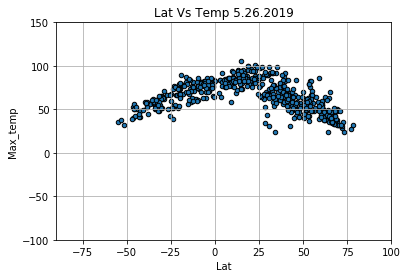

In [29]:
#plot lat vs temp
lat_temp_plt = weatherpy_df.plot.scatter('Lat', 'Max_temp', title='Lat Vs Temp 5.26.2019', marker ='o',
                       s=20, xlim=[-90, 100], ylim=[-100, 150], edgecolor = 'black', grid=True)
plt.savefig('LatVTemp.png')

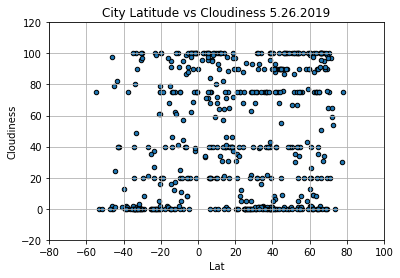

In [36]:
#city lat vs humidity

Cloudieness =weatherpy_df.plot.scatter('Lat','Cloudiness', title='City Latitude vs Cloudiness 5.26.2019',
                                s=20, marker='o', xlim=[-80,100], ylim=[-20,120], edgecolor='black', grid=True)
plt.savefig('city_latVS_Humidity.png')

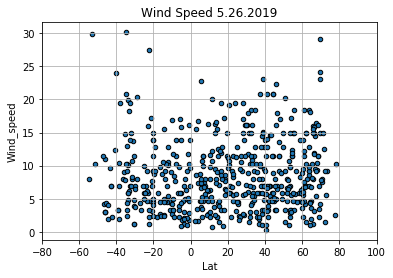

In [26]:
#lat vs wind speed
wind_speed=weatherpy_df.plot.scatter('Lat','Wind_speed', title='Wind Speed 5.26.2019',
                                   s=20, marker='o', xlim=[-80,100], edgecolor='black', grid=True)
plt.savefig('windVSLat.png')

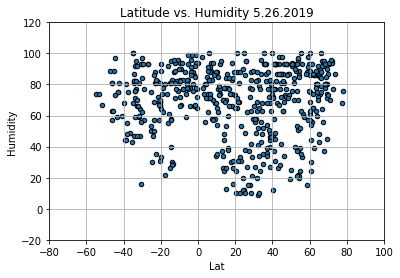

In [34]:
Lat_vs_Humidity=weatherpy_df.plot.scatter('Lat','Humidity', title='Latitude vs. Humidity 5.26.2019',
                                   s=20, marker='o', xlim=[-80,100], ylim=[-20,120], edgecolor='black', grid=True)
plt.savefig('LatVHumidity.png')

In [ ]:
#having fun trying to play with Geopandas
#gdf = geopandas.GeoDataFrame(weather_df, geometry=geopandas.points_from_xy(weather_df.Lng, weather_df.Lat))
#just kidding thats a lot of work

Three Observations 
1. The cloudness kind of throws me off, it makes me wonder where the locations that are in the middle to top are when it comes to how cloudy it is becasue they are at the same latitude but there are more citites with 0 cloudy

2. the latitude vs Humidity one almost looks like it is ploting on the world (which i was going to do with geopandas but didn't have time. But that is something that you could do to visualize the data and make it make some more sense.. 

3. latitude has a big impact on the temp, the higher you are the colder it will be but if you are in the middle it is more normal.. I also think that something went wrong with my temp/lat plots but at least it still looks kinda right 
